In [2]:
import pandas as pd
df=pd.read_csv("d:/learn/data/train3.csv")
df.head()

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,Fare,Survived
0,0,0,1,1,22.0,7.2500,0
1,1,0,0,0,38.0,71.2833,1
2,0,0,1,0,26.0,7.9250,1
3,1,0,0,0,35.0,53.1000,1
4,0,0,1,1,35.0,8.0500,0


In [3]:
df.columns

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex', 'Age', 'Fare', 'Survived'], dtype='object')

In [4]:
df.shape

(891, 7)

In [5]:
df.describe()

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.242424,0.206510,0.551066,0.647587,29.758889,32.204208,0.383838
std,0.428790,0.405028,0.497665,0.477990,13.002570,49.693429,0.486592
min,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,22.000000,7.910400,0.000000
50%,0.000000,0.000000,1.000000,1.000000,30.000000,14.454200,0.000000
75%,0.000000,0.000000,1.000000,1.000000,35.000000,31.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,80.000000,512.329200,1.000000


In [6]:
df.groupby("Survived").mean()

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,Fare
Survived,,,,,,
0,0.145719,0.176685,0.677596,0.852459,30.483607,22.117887
1,0.397661,0.254386,0.347953,0.318713,28.595526,48.395408


In [7]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, '분류\n(0:사망, 1:생존)')

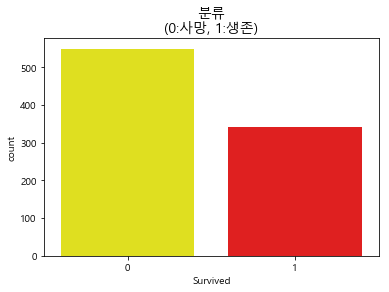

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc("font",family=font_name)

colors=["yellow","red"]
sns.countplot("Survived",data=df,palette=colors)
plt.title("분류\n(0:사망, 1:생존)",fontsize=14)

In [9]:
train_cols=df.columns[0:6]
X=df[train_cols]
y=df["Survived"]

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5F197E6D8>,
      dtype=object)

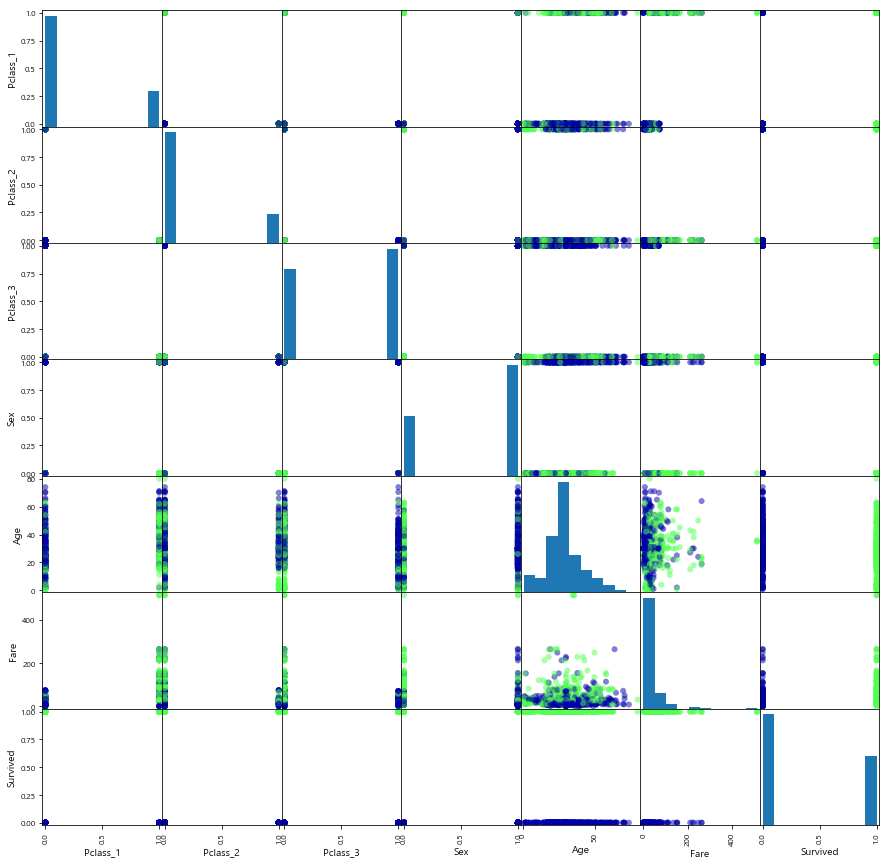

In [10]:
import mglearn
pd.plotting.scatter_matrix(df,c=y,figsize=(15,15),marker="o", cmap=mglearn.cm3)

In [11]:
#오버샘플링
from imblearn.over_sampling import SMOTE

X_sample,y_sample=SMOTE(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=["Survived"])
df2=pd.concat([X_samp,y_samp],axis=1)

In [12]:
df2["Survived"].value_counts()

1    549
0    549
Name: Survived, dtype: int64

In [13]:
X=X_samp[train_cols]
y=y_samp["Survived"]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

In [15]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(random_state=100)
model.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=100, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
import numpy as np
pred=model.predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(np.mean(pred==y_test))

0.7984054669703873
0.7863636363636364
0.7863636363636364


In [17]:
#스케일링
mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)
X_train_scaled=(X_train - mean_on_train) / std_on_train
X_test_scaled=(X_test - mean_on_train) / std_on_train

In [18]:
model=MLPClassifier(random_state=100)
model.fit(X_train_scaled,y_train)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=100, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))
#성능이 개선됨

0.8234624145785877
0.8181818181818182


In [20]:
model=MLPClassifier(random_state=100,max_iter=300)
model.fit(X_train_scaled,y_train)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=100, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [21]:
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))
#성능이 개선됨

0.8325740318906606
0.8227272727272728


In [21]:
#은닉노드 갯수를 1000개로 늘림
model=MLPClassifier(random_state=100,max_iter=300,
                   hidden_layer_sizes=[1000])
model.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[1000], learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=100, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [22]:
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))
#성능이 개선되지 않음

0.8507972665148064
0.8136363636363636


In [23]:
#은닉층을 2개로 설정
model=MLPClassifier(random_state=100,max_iter=300,
                   hidden_layer_sizes=[100,100])
model.fit(X_train_scaled,y_train)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100], learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=100, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [24]:
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))
#성능이 개선됨

0.8678815489749431
0.85


In [25]:
#은닉층을 3개로 설정
model=MLPClassifier(random_state=100,max_iter=300,
                   hidden_layer_sizes=[100,100,100])
model.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100, 100], learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=100, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [26]:
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))
#성능이 개선되지 않음

0.8519362186788155
0.8181818181818182


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


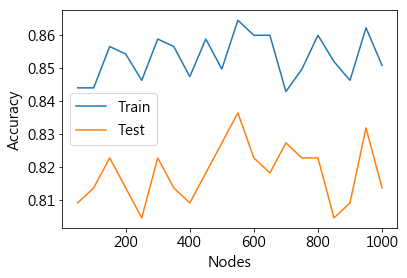

In [33]:
#최적의 노드수를 찾기 위한 코드
train_rate=[] #학습용 데이터셋의 정확도
test_rate=[] #검증용 데이터셋의 정확도
nodes=range(50,1001,50) #노드수 50~1000
for n in nodes:
    model=MLPClassifier(random_state=100,max_iter=1000,hidden_layer_sizes=[n])
    model.fit(X_train_scaled,y_train)
    train_rate.append(model.score(X_train_scaled,y_train))
    test_rate.append(model.score(X_test_scaled,y_test))
    
plt.rcParams["font.size"]=15
plt.plot(nodes,train_rate,label="Train")
plt.plot(nodes,test_rate,label="Test")
plt.ylabel("Accuracy")
plt.xlabel("Nodes")
plt.legend()

In [34]:
np.max(test_rate)

0.8363636363636363

In [35]:
test_rate

[0.8090909090909091,
 0.8136363636363636,
 0.8227272727272728,
 0.8136363636363636,
 0.8045454545454546,
 0.8227272727272728,
 0.8136363636363636,
 0.8090909090909091,
 0.8181818181818182,
 0.8272727272727273,
 0.8363636363636363,
 0.8227272727272728,
 0.8181818181818182,
 0.8272727272727273,
 0.8227272727272728,
 0.8227272727272728,
 0.8045454545454546,
 0.8090909090909091,
 0.8318181818181818,
 0.8136363636363636]